In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np

# Study data files
mouse_metadata_path = os.path.join("..", "data", "Mouse_metadata.csv")
study_results_path = os.path.join("..", "data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
merge_table = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
merge_table

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice
number_of_mice = len(merge_table["Mouse ID"].unique())
number_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = merge_table.loc[merge_table.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_table = merge_table[merge_table["Mouse ID"].isin(duplicate_mice)==False]
clean_table

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
 # Checking the number of mice in the clean DataFrame
clean_mice = len(clean_table["Mouse ID"].unique())
clean_mice

248

In [8]:
# Summary Statistics 

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_table.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_table.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = clean_table.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
STD = clean_table.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM = clean_table.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stat = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, "Standard Deviation":STD, "SEM":SEM})
summary_stat = summary_stat.round(2)
summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


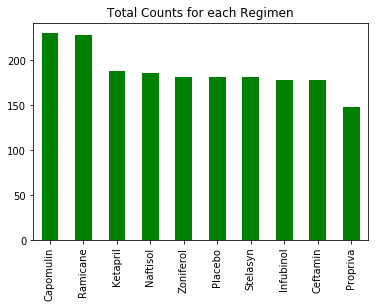

In [9]:
# Bar & Pie Plots 

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas
drug_regimen = clean_table["Drug Regimen"].value_counts()
x_axis = drug_regimen.index
y_axis = drug_regimen.values

drug_regimen.plot(kind="bar", color="green", title = "Total Counts for each Regimen")

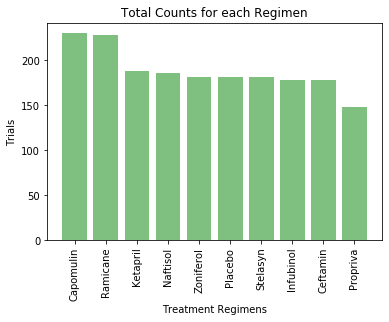

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot
y_axis = drug_regimen.values
x_axis = drug_regimen.index

plt.bar(x_axis, y_axis, color="g", alpha=0.5, align= "center")
plt.xlabel("Treatment Regimens")
plt.ylabel("Trials")
plt.title("Total Counts for each Regimen")
plt.xticks(rotation=90)
plt.show()

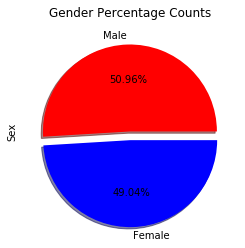

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_table["Sex"].value_counts()
explode = (0,0.1)
colors = ("red","blue")
gender_count.plot(kind="pie", shadow=True, autopct="%1.2f%%", explode=explode, colors=colors, title = "Gender Percentage Counts")

Text(0.5, 1.0, 'Gender Percentage Counts')

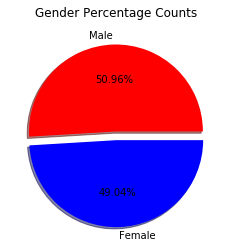

In [12]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, shadow=True, autopct="%1.2f%%", explode=explode, colors=colors, labels=("Male", "Female"))
plt.title("Gender Percentage Counts")

In [13]:
# Quartiles, Outliers, & Boxplots

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
regimen_final = clean_table.loc[clean_table["Drug Regimen"].isin(regimen_list)]

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume = regimen_final.groupby(regimen_final["Mouse ID"]).agg({"Timepoint":["max"]})
tumor_volume.columns = ["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = tumor_volume.reset_index()
tumor_volume_final = pd.merge(tumor_volume, clean_table, how="left", on=["Mouse ID", "Timepoint"])
tumor_volume_final

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #Locate the rows which contain mice on each drug and get the tumor volumes
for drug in regimen_list:
            tumor_regimen_volume = tumor_volume_final["Tumor Volume (mm3)"].loc[tumor_volume_final["Drug Regimen"]== drug]
    
    # Add Subset 
            tumor_volumes.append(tumor_regimen_volume)
    
    # Determine outliers using upper and lower bounds
            quartiles = tumor_regimen_volume.quantile([.25,.5,.75])
            lower_quartile = quartiles[0.25]
            upper_quartile = quartiles[0.75]
            IQR = upper_quartile - lower_quartile
            print(f'For {drug}, Interquartile Range (IQR) is {round(IQR,2)}')
            lower_bound = lower_quartile - (1.5 * IQR)
            upper_bound = upper_quartile + (1.5 * IQR)
            print(f"For {drug}, values below {round(lower_bound,2)} could be outliers")
            print(f"For {drug}, values above {round(upper_bound,2)} could be outliers\n")


For Capomulin, Interquartile Range (IQR) is 7.78
For Capomulin, values below 20.7 could be outliers
For Capomulin, values above 51.83 could be outliers

For Ramicane, Interquartile Range (IQR) is 9.1
For Ramicane, values below 17.91 could be outliers
For Ramicane, values above 54.31 could be outliers

For Infubinol, Interquartile Range (IQR) is 11.48
For Infubinol, values below 36.83 could be outliers
For Infubinol, values above 82.74 could be outliers

For Ceftamin, Interquartile Range (IQR) is 15.58
For Ceftamin, values below 25.36 could be outliers
For Ceftamin, values above 87.67 could be outliers



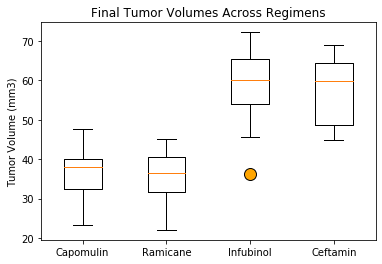

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_dot = dict(markerfacecolor='orange', markersize=12)

fig, ax = plt.subplots()
ax.set_title("Final Tumor Volumes Across Regimens")
ax.set_xticklabels(regimen_list)
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(tumor_volumes, flierprops=orange_dot)
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

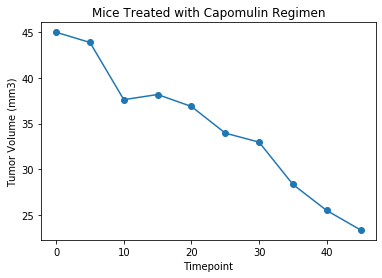

In [22]:
# Line & Scatter Plots 
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mice = clean_table[["Timepoint","Tumor Volume (mm3)"]].loc[(clean_table["Drug Regimen"]=="Capomulin")&(clean_table["Mouse ID"]=="s185")]

plt.plot(capomulin_mice["Timepoint"],capomulin_mice["Tumor Volume (mm3)"], marker='o')
plt.title("Mice Treated with Capomulin Regimen")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

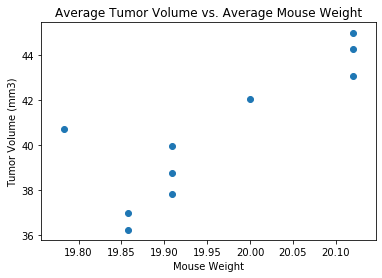

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_average = clean_table.loc[clean_table["Drug Regimen"]=="Capomulin"].groupby(clean_table["Timepoint"]).agg({"Tumor Volume (mm3)":["mean"], "Weight (g)":["mean"]})
capomulin_average.columns= ["Average Tumor Volume {mm3}","Average Mouse Weight (g)"]

AMW = capomulin_average["Average Mouse Weight (g)"]
ATV = capomulin_average["Average Tumor Volume {mm3}"]
plt.scatter(AMW,ATV)
plt.title("Average Tumor Volume vs. Average Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")

Correlation between Average Tumor Volume and Mouse Weight for the Capomulin Regimen is 0.82
Linear Regression Equation for the Capomulin Regimen is y = 20.29x + -364.52


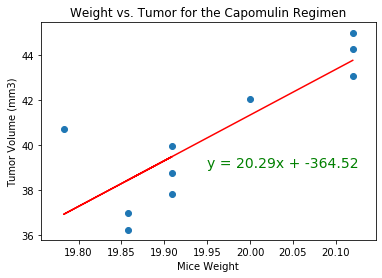

In [46]:
 # Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(AMW,ATV)
print(f'Correlation between Average Tumor Volume and Mouse Weight for the Capomulin Regimen is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(AMW,ATV)
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Linear Regression Equation for the Capomulin Regimen is {equation}')

plt.scatter(AMW,ATV)
plt.title("Weight vs. Tumor for the Capomulin Regimen")
plt.xlabel("Mice Weight")
plt.ylabel("Tumor Volume (mm3)")

regress_values = AMW * slope + intercept
plt.plot(AMW, regress_values, "r-")
plt.annotate(equation,(19.95,39),fontsize=14,color="green")
plt.show()